## Final Project Submission

Please fill out:
* Student name: William Newton
* Student pace: Full Time Data Science
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


# Import Libraries and Packages #

In [10]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns

# Import Data #

* Import Data using Pandas and set Max View Columns to all

In [3]:
df=pd.read_csv('kc_house_data.csv')
pd.set_option('max_columns', None)

# Data Cleaning #

* Set Date, Yr_built, yr_renovated column to DateTime format
* Set Condition, Floors data type to int
* Replaced NaN values in Waterfront and Yr_renovated column to 0
* Created new column for Renovated Yes/No

In [4]:
df['date']=pd.to_datetime(df['date'],format='%m/%d/%Y')
df['yr_built']=df['yr_built'].astype(int)
df.condition=df.condition.astype(int)
df.waterfront.fillna(0,inplace=True)
df['Renovated'] = [True if x > 0 else False for x in df['yr_renovated']]
df.yr_renovated=df.yr_renovated.fillna(0).astype(int)
df.sqft_basement.replace({'?':0.0}, inplace=True)
df.sqft_basement=df.sqft_basement.astype(float)
df.waterfront=df.waterfront.astype(int)

In [5]:
df.view.fillna(0,inplace=True)
df.view=df.view.astype(int)

In [50]:
df.drop(columns='Renovated',inplace=True)
df.head()

KeyError: "['Renovated'] not found in axis"

* dropped sqft_living and sqft_above columns as they were collinear with two many other columns which would have interfered with the model later on in the process

In [27]:
df_test = df.copy()
df_test.drop(columns=['sqft_living','sqft_above'],inplace=True)
(abs(df_test.corr()) > .75).sum()

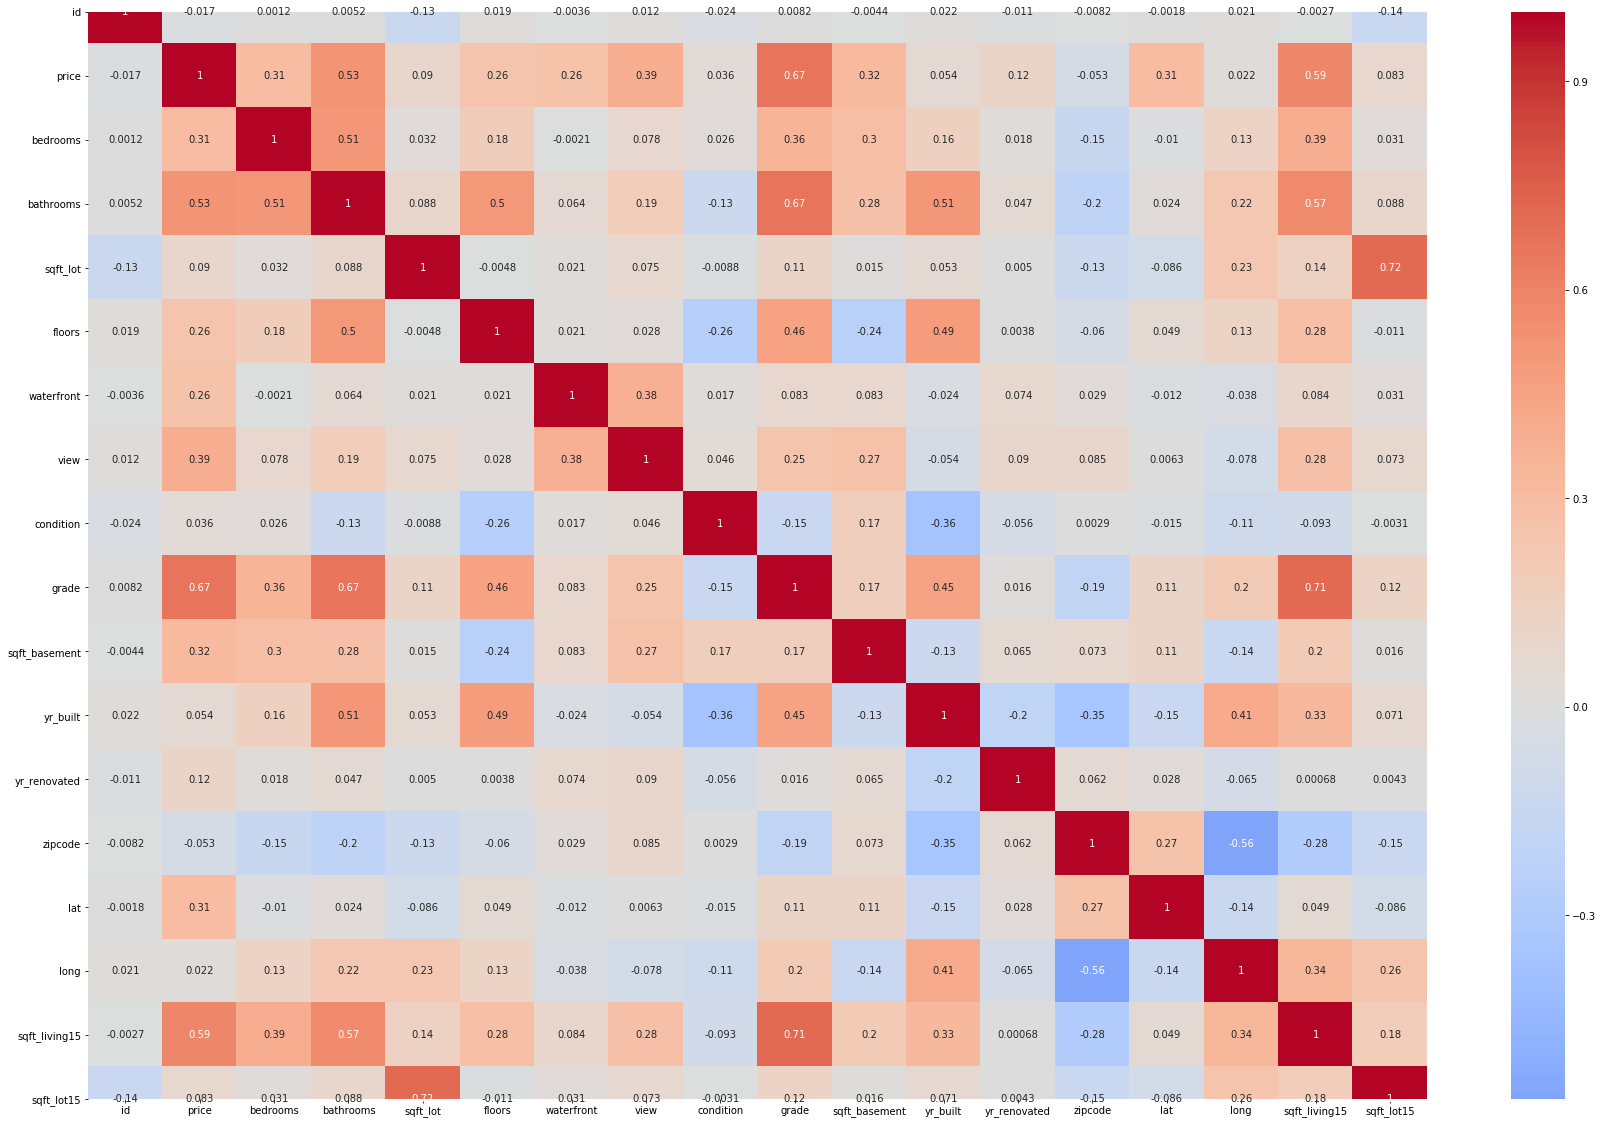

In [39]:
fig=plt.figure(figsize=(30,20))
sns.heatmap(df_test.corr(),center=0, annot=True,cmap='coolwarm')

In [40]:
(abs(df_test.corr()) > .75)

,id,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False


In [42]:
df_test.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [46]:
y=df_test['price']
X=df_test.drop(columns=['id','date','price'])
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view',
       'condition', 'grade', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
f='price~sqft_living+sqft_above+bedrooms+bathrooms+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'
model=ols(formula=f,data=df_test).fit()

PatsyError: Error evaluating factor: NameError: name 'sqft_living' is not defined
    price~sqft_living+sqft_above+bedrooms+bathrooms+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15
          ^^^^^^^^^^^

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     2695.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        14:55:12   Log-Likelihood:            -2.9553e+05
No. Observations:               21597   AIC:                         5.911e+05
Df Residuals:                   21580   BIC:                         5.912e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.388e+07   3.08e+06      4.498      0.000    7.83e+06    1.99e+07
bedrooms      -6884.8880   1904.024     -3.616      0.000   -1.06e+04   -3152.861
bathrooms      9.276e+04   3251.514     28.527      0.000    8.64e+04    9.91e+04
sqft_lot          0.2744      0.050      5.441      0.000       0.176       0.373
floors         3.453e+04   3733.685      9.248      0.000    2.72e+04    4.18e+04
waterfront     6.609e+05   1.91e+04     34.600      0.000    6.23e+05    6.98e+05
view           5.173e+04   2236.041     23.134      0.000    4.73e+04    5.61e+04
condition      2.431e+04   2472.491      9.833      0.000    1.95e+04    2.92e+04
grade          1.387e+05   2094.826     66.201      0.000    1.35e+05    1.43e+05
sqft_basement    57.6441      4.172     13.817      0.000      49.467      65.822
yr_built      -3182.5905     74.938    -42.470      0.000   -3329.475   -3035.706
yr_renovated     23.0532      4.194      5.497      0.000      14.833      31.274
zipcode        -540.7751     34.773    -15.551      0.000    -608.934    -472.617
lat            5.611e+05   1.13e+04     49.699      0.000    5.39e+05    5.83e+05
long          -1.449e+05   1.38e+04    -10.514      0.000   -1.72e+05   -1.18e+05
sqft_living15    89.2170      3.336     26.744      0.000      82.678      95.756
sqft_lot15       -0.1911      0.077     -2.475      0.013      -0.342      -0.040
==============================================================================
Omnibus:                    21160.487   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3441644.219
Skew:                           4.374   Prob(JB):                         0.00
Kurtosis:                      64.221   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
f='price~sqft_living+bedrooms+bathrooms+sqft_lot+floors+waterfront+view+condition+grade+sqft_basement+yr_built+yr_renovated+zipcode+lat+long+sqft_living15+sqft_lot15'
model=ols(formula=f,data=df).fit()

In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2960.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        15:05:19   Log-Likelihood:            -2.9440e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21579   BIC:                         5.890e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.093e+06   2.93e+06      2.421      0.016    1.35e+06    1.28e+07
sqft_living     179.2610      3.661     48.966      0.000     172.085     186.437
bedrooms      -3.595e+04   1901.365    -18.906      0.000   -3.97e+04   -3.22e+04
bathrooms      4.099e+04   3260.847     12.571      0.000    3.46e+04    4.74e+04
sqft_lot          0.1313      0.048      2.738      0.006       0.037       0.225
floors         8670.4155   3581.317      2.421      0.015    1650.769    1.57e+04
waterfront     6.193e+05   1.81e+04     34.136      0.000    5.84e+05    6.55e+05
view           5.295e+04   2121.489     24.958      0.000    4.88e+04    5.71e+04
condition      2.651e+04   2346.094     11.300      0.000    2.19e+04    3.11e+04
grade          9.716e+04   2160.730     44.965      0.000    9.29e+04    1.01e+05
sqft_basement   -27.3932      4.322     -6.338      0.000     -35.865     -18.921
yr_built      -2637.3286     71.961    -36.649      0.000   -2778.378   -2496.280
yr_renovated     23.4293      3.979      5.889      0.000      15.631      31.228
zipcode        -585.8140     33.003    -17.751      0.000    -650.501    -521.127
lat            5.997e+05   1.07e+04     55.838      0.000    5.79e+05    6.21e+05
long          -2.156e+05   1.32e+04    -16.390      0.000   -2.41e+05    -1.9e+05
sqft_living15    22.2549      3.448      6.455      0.000      15.497      29.013
sqft_lot15       -0.3901      0.073     -5.316      0.000      -0.534      -0.246
==============================================================================
Omnibus:                    18384.700   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1851744.488
Skew:                           3.574   Prob(JB):                         0.00
Kurtosis:                      47.796   Cond. No.                     2.15e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
model_results_df = pd.DataFrame(columns=['Model #','Condition','R^2 Value'])
results1=pd.DataFrame({'Model #': 1,'Condition': 'Baseline(no variables dropped)','R^2 Value':.7},index=range(1))
results1

,Model #,Condition,R^2 Value
0,1,Baseline(no variables dropped),0.7


In [98]:
model_results_df=model_results_df.append(results1)

In [102]:
results2=pd.DataFrame({'Model #': 2,'Condition': 'Dropped sqft_living','R^2 Value':.666},index=range(1))
model_results_df = model_results_df.append(results2)
model_results_df

,Model #,Condition,R^2 Value
0,1,Baseline(no variables dropped),0.700
0,2,Dropped sqft_living,0.666
